In [1]:
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt

# NS-SeC data preprocessing

In [9]:
# LSOA PWC data. PWC - population weighted centroids
london_lsoa_pwc = gpd.read_file("data/gis/London_lsoa_pwc_2021/London_lsoa_pwc.shp")
london_lsoa_pwc.drop(columns=["label"], inplace=True)
london_lsoa_pwc

,lsoa21cd,lsoa21nm,geometry
0,E01004171,Sutton 010A,POINT (528579.903 165022.319)
1,E01034606,Hillingdon 016G,POINT (505650.906 182758.763)
2,E01004000,Southwark 026A,POINT (535329.244 176070.192)
3,E01002382,Havering 014F,POINT (552656.220 188772.754)
4,E01000899,Camden 002E,POINT (526424.457 186182.757)
...,...,...,...
4989,E01000888,Camden 006C,POINT (527783.945 185545.453)
4990,E01001883,Hammersmith and Fulham 017D,POINT (525311.247 177789.102)
4991,E01001963,Haringey 009A,POINT (528826.606 190546.314)
4992,E01000670,Bromley 018A,POINT (540415.443 168291.379)


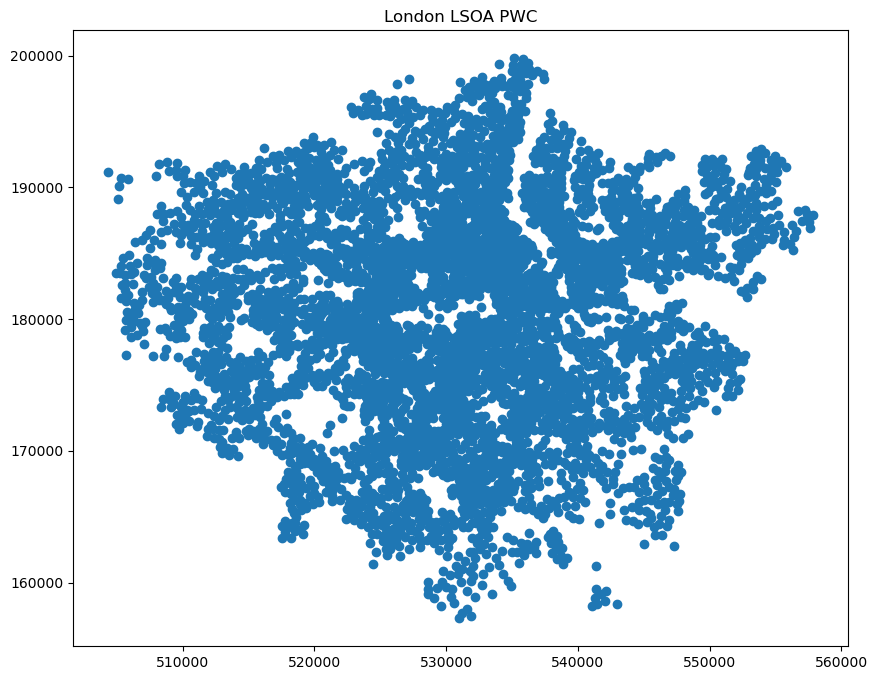

In [10]:
# Plot the data
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
london_lsoa_pwc.plot(ax=ax, legend=True)
plt.title("London LSOA PWC")
plt.show()

In [11]:
# Get lsoa ns-sec data
lsoa_ns_sec = pd.read_csv("data/socioeconomic/lon_lsoa_ns-sec.csv")
lsoa_ns_sec.drop(columns=["Lower layer Super Output Areas"], inplace=True)
lsoa_ns_sec.rename(columns={"Lower layer Super Output Areas Code": "lsoa21cd", 
                            "National Statistics Socio-economic Classification (NS-SeC) (10 categories) Code": "ns-sec_code",
                            "National Statistics Socio-economic Classification (NS-SeC) (10 categories)": "ns-sec_name"}, inplace=True)
lsoa_ns_sec.drop(columns=["ns-sec_name"], inplace=True)

# Remove the rows with ns-sec_code = -8
lsoa_ns_sec = lsoa_ns_sec[lsoa_ns_sec["ns-sec_code"] != -8]

lsoa_ns_sec

,lsoa21cd,ns-sec_code,Observation
1,E01000001,1,618
2,E01000001,2,369
3,E01000001,3,71
4,E01000001,4,115
5,E01000001,5,11
...,...,...,...
49935,E01035722,5,40
49936,E01035722,6,58
49937,E01035722,7,39
49938,E01035722,8,102


In [12]:
lsoa_ns_sec.head(10)

,lsoa21cd,ns-sec_code,Observation
1,E01000001,1,618
2,E01000001,2,369
3,E01000001,3,71
4,E01000001,4,115
5,E01000001,5,11
6,E01000001,6,33
7,E01000001,7,16
8,E01000001,8,37
9,E01000001,9,84
11,E01000002,1,631


In [13]:
# make the values in ns-sec_code to column names
lsoa_ns_sec = lsoa_ns_sec.pivot(index="lsoa21cd", columns="ns-sec_code", values="Observation")

lsoa_ns_sec.reset_index(inplace=True)
lsoa_ns_sec.columns.name = None
lsoa_ns_sec.rename(columns={1: "ns-sec_1", 2: "ns-sec_2", 3: "ns-sec_3", 4: "ns-sec_4", 5: "ns-sec_5", 6: "ns-sec_6", 7: "ns-sec_7", 8: "ns-sec_8", 9: "ns-sec_9"}, inplace=True)
lsoa_ns_sec

,lsoa21cd,ns-sec_1,ns-sec_2,ns-sec_3,ns-sec_4,ns-sec_5,ns-sec_6,ns-sec_7,ns-sec_8,ns-sec_9
0,E01000001,618,369,71,115,11,33,16,37,84
1,E01000002,631,358,55,95,7,15,10,40,88
2,E01000003,506,427,133,128,32,70,70,72,68
3,E01000005,144,140,60,57,42,102,103,151,163
4,E01000006,118,212,128,237,70,162,163,185,156
...,...,...,...,...,...,...,...,...,...,...
4989,E01035718,506,277,163,181,33,47,45,135,920
4990,E01035719,369,251,62,84,19,56,39,109,112
4991,E01035720,260,220,99,93,28,91,59,61,151
4992,E01035721,474,381,152,243,46,169,127,241,187


In [14]:
# Calculate the proportion of each ns-sec category
# First calculate the total number of people in each lsoa by summing the values of all ns-sec categories
lsoa_ns_sec["total"] = lsoa_ns_sec.iloc[:, 1:10].sum(axis=1)
lsoa_ns_sec["ns-sec_1"] = lsoa_ns_sec["ns-sec_1"] / lsoa_ns_sec["total"]
lsoa_ns_sec["ns-sec_2"] = lsoa_ns_sec["ns-sec_2"] / lsoa_ns_sec["total"]
lsoa_ns_sec["ns-sec_3"] = lsoa_ns_sec["ns-sec_3"] / lsoa_ns_sec["total"]
lsoa_ns_sec["ns-sec_4"] = lsoa_ns_sec["ns-sec_4"] / lsoa_ns_sec["total"]
lsoa_ns_sec["ns-sec_5"] = lsoa_ns_sec["ns-sec_5"] / lsoa_ns_sec["total"]
lsoa_ns_sec["ns-sec_6"] = lsoa_ns_sec["ns-sec_6"] / lsoa_ns_sec["total"]
lsoa_ns_sec["ns-sec_7"] = lsoa_ns_sec["ns-sec_7"] / lsoa_ns_sec["total"]
lsoa_ns_sec["ns-sec_8"] = lsoa_ns_sec["ns-sec_8"] / lsoa_ns_sec["total"]
lsoa_ns_sec["ns-sec_9"] = lsoa_ns_sec["ns-sec_9"] / lsoa_ns_sec["total"]
lsoa_ns_sec.drop(columns=["total"], inplace=True)
lsoa_ns_sec

,lsoa21cd,ns-sec_1,ns-sec_2,ns-sec_3,ns-sec_4,ns-sec_5,ns-sec_6,ns-sec_7,ns-sec_8,ns-sec_9
0,E01000001,0.456425,0.272526,0.052437,0.084934,0.008124,0.024372,0.011817,0.027326,0.062038
1,E01000002,0.485758,0.275597,0.042340,0.073133,0.005389,0.011547,0.007698,0.030793,0.067744
2,E01000003,0.335989,0.283533,0.088313,0.084993,0.021248,0.046481,0.046481,0.047809,0.045153
3,E01000005,0.149688,0.145530,0.062370,0.059252,0.043659,0.106029,0.107069,0.156965,0.169439
4,E01000006,0.082460,0.148148,0.089448,0.165618,0.048917,0.113208,0.113906,0.129280,0.109015
...,...,...,...,...,...,...,...,...,...,...
4989,E01035718,0.219332,0.120069,0.070655,0.078457,0.014304,0.020373,0.019506,0.058518,0.398786
4990,E01035719,0.335150,0.227975,0.056312,0.076294,0.017257,0.050863,0.035422,0.099001,0.101726
4991,E01035720,0.244821,0.207156,0.093220,0.087571,0.026365,0.085687,0.055556,0.057439,0.142185
4992,E01035721,0.234653,0.188614,0.075248,0.120297,0.022772,0.083663,0.062871,0.119307,0.092574


In [15]:
# Merge lsoa_ns_sec with london_lsoa_pwc
london_lsoa_pwc = london_lsoa_pwc.merge(lsoa_ns_sec, on="lsoa21cd")
london_lsoa_pwc

,lsoa21cd,lsoa21nm,geometry,ns-sec_1,ns-sec_2,ns-sec_3,ns-sec_4,ns-sec_5,ns-sec_6,ns-sec_7,ns-sec_8,ns-sec_9
0,E01004171,Sutton 010A,POINT (528579.903 165022.319),0.172000,0.238400,0.135200,0.112000,0.055200,0.092800,0.071200,0.068000,0.055200
1,E01034606,Hillingdon 016G,POINT (505650.906 182758.763),0.066694,0.083264,0.049296,0.037697,0.024441,0.038111,0.029826,0.035211,0.635460
2,E01004000,Southwark 026A,POINT (535329.244 176070.192),0.169031,0.238125,0.086983,0.064775,0.034547,0.093152,0.096854,0.124614,0.091919
3,E01002382,Havering 014F,POINT (552656.220 188772.754),0.212264,0.221698,0.133423,0.118598,0.030997,0.085580,0.068733,0.068733,0.059973
4,E01000899,Camden 002E,POINT (526424.457 186182.757),0.389105,0.256809,0.056031,0.123735,0.011673,0.035798,0.017899,0.040467,0.068482
...,...,...,...,...,...,...,...,...,...,...,...,...
4989,E01000888,Camden 006C,POINT (527783.945 185545.453),0.301003,0.238294,0.071906,0.098662,0.026756,0.052676,0.049331,0.078595,0.082776
4990,E01001883,Hammersmith and Fulham 017D,POINT (525311.247 177789.102),0.304982,0.202309,0.055286,0.081409,0.025516,0.065614,0.055893,0.084447,0.124544
4991,E01001963,Haringey 009A,POINT (528826.606 190546.314),0.316364,0.288000,0.079273,0.114182,0.016727,0.036364,0.030545,0.045818,0.072727
4992,E01000670,Bromley 018A,POINT (540415.443 168291.379),0.266376,0.268871,0.116032,0.117280,0.028072,0.053649,0.034311,0.061759,0.053649


In [ ]:
# Save the data
# london_lsoa_pwc.to_file("data/socioeconomic/london_lsoa_pwc_ns-sec.geojson", driver="GeoJSON")

# Downstream supervised training

In [16]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

import time

from model import LocCLIPLightning

In [17]:
# Helper function
def set_seed(seed):
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)


def load_model(ckpt_path, device, return_all=False):
    ckpt = torch.load(ckpt_path, map_location=device)
    lightning_model = LocCLIPLightning(**ckpt["hyper_parameters"]).to(device)
    lightning_model.load_state_dict(ckpt["state_dict"])
    lightning_model.eval()

    model = lightning_model.model

    if return_all:
        return model
    else:
        return model.loc_enc

In [18]:
# SC-SEC distribution mapping model
# Linear model
class LinearModel(nn.Module):
    def __init__(self, in_features, out_features):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(in_features, out_features)

    def forward(self, x):
        return self.linear(x)


# A non-linear model - an MLP with 1 hidden layer and ReLU activation.
class MLPModel(nn.Module):
    def __init__(self, in_features, hidden_features, out_features):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(in_features, hidden_features)
        self.fc2 = nn.Linear(hidden_features, out_features)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [19]:
# Dataset
# The SEDataset class: getitem returns a tuple of the coordinates of the point and the corresponding ns-sec distribution - a tensor of shape (9,)
class SEDataset(Dataset):
    def __init__(self, gdf):
        self.gdf = gdf

    def __len__(self):
        return len(self.gdf)

    def __getitem__(self, idx):
        row = self.gdf.iloc[idx]
        inds = torch.tensor(row["lsoa_idx"], dtype=torch.long)
        coords = torch.tensor([row["geometry"].x, row["geometry"].y], dtype=torch.float64)
        ns_sec = np.array(row[["ns-sec_1", "ns-sec_2", "ns-sec_3", "ns-sec_4", "ns-sec_5", "ns-sec_6", "ns-sec_7", "ns-sec_8", "ns-sec_9"]], dtype=np.float32)
        ns_sec = torch.tensor(ns_sec, dtype=torch.float32)
        return inds, coords, ns_sec

In [20]:
# Read the sc-sec data
london_lsoa_se = gpd.read_file("data/socioeconomic/london_lsoa_pwc_ns-sec.geojson")
london_lsoa_se["lsoa_idx"] = london_lsoa_se.index
london_lsoa_se

,lsoa21cd,lsoa21nm,ns-sec_1,ns-sec_2,ns-sec_3,ns-sec_4,ns-sec_5,ns-sec_6,ns-sec_7,ns-sec_8,ns-sec_9,geometry,lsoa_idx
0,E01004171,Sutton 010A,0.172000,0.238400,0.135200,0.112000,0.055200,0.092800,0.071200,0.068000,0.055200,POINT (528579.903 165022.319),0
1,E01034606,Hillingdon 016G,0.066694,0.083264,0.049296,0.037697,0.024441,0.038111,0.029826,0.035211,0.635460,POINT (505650.906 182758.763),1
2,E01004000,Southwark 026A,0.169031,0.238125,0.086983,0.064775,0.034547,0.093152,0.096854,0.124614,0.091919,POINT (535329.244 176070.192),2
3,E01002382,Havering 014F,0.212264,0.221698,0.133423,0.118598,0.030997,0.085580,0.068733,0.068733,0.059973,POINT (552656.220 188772.754),3
4,E01000899,Camden 002E,0.389105,0.256809,0.056031,0.123735,0.011673,0.035798,0.017899,0.040467,0.068482,POINT (526424.457 186182.757),4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4989,E01000888,Camden 006C,0.301003,0.238294,0.071906,0.098662,0.026756,0.052676,0.049331,0.078595,0.082776,POINT (527783.945 185545.453),4989
4990,E01001883,Hammersmith and Fulham 017D,0.304982,0.202309,0.055286,0.081409,0.025516,0.065614,0.055893,0.084447,0.124544,POINT (525311.247 177789.102),4990
4991,E01001963,Haringey 009A,0.316364,0.288000,0.079273,0.114182,0.016727,0.036364,0.030545,0.045818,0.072727,POINT (528826.606 190546.314),4991
4992,E01000670,Bromley 018A,0.266376,0.268871,0.116032,0.117280,0.028072,0.053649,0.034311,0.061759,0.053649,POINT (540415.443 168291.379),4992


In [21]:
# Prepare the Dataset

# Train-val-test split
train_data, test_data = train_test_split(london_lsoa_se, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.1, random_state=42)

# Dataset
train_dataset = SEDataset(train_data)
val_dataset = SEDataset(val_data)
test_dataset = SEDataset(test_data)

# DataLoader with batch size 128
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128)
test_loader = DataLoader(test_dataset, batch_size=128)

print("Length of train_loader:", len(train_loader))
print("Length of val_loader:", len(val_loader))
print("Length of test_loader:", len(test_loader))

Length of train_loader: 29
Length of val_loader: 4
Length of test_loader: 8


In [22]:
# test the dataloader

for i, (inds, _, ns_sec) in enumerate(val_loader):
    print(inds[:5], ns_sec[:5])
    break

tensor([4670, 3389, 2661,  860,   27]) tensor([[0.1576, 0.1680, 0.1102, 0.1375, 0.0188, 0.0986, 0.0694, 0.1213, 0.1187],
        [0.3025, 0.2878, 0.0910, 0.1026, 0.0216, 0.0440, 0.0285, 0.0494, 0.0725],
        [0.2685, 0.2231, 0.0548, 0.1102, 0.0247, 0.0595, 0.0428, 0.1249, 0.0915],
        [0.1172, 0.1883, 0.1366, 0.1145, 0.0448, 0.1034, 0.1007, 0.1166, 0.0779],
        [0.0766, 0.1482, 0.1116, 0.1049, 0.0425, 0.1249, 0.1232, 0.1507, 0.1174]])


## CaLLiPer

In [ ]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("cuda:0")

# Load the pretrained location encoder
# CaLLiPer-SenTrans checkpoint path
ckpt_path = "checkpoints/epoch=63-val_loss=6.42.ckpt"

pretrianed_loc_encoder = load_model(ckpt_path, device=device)
for param in pretrianed_loc_encoder.parameters():
    param.requires_grad = False

In [ ]:
# Train the downstream model
classifier_type = "nonlinear"
# save_dir = "downstream_res/se_dist/calliper_sphericalharmonics_fcnet/l20"
save_dir = "downstream_res/se_dist/calliper_sentrans"

# Create the save directory if it does not exist
os.makedirs(save_dir, exist_ok=True)

for i, seed in enumerate([42, 24, 7, 0, 100]):
    print(f"============The {i+1}th run with seed {seed}===============")

    # Initialize the model
    if classifier_type == "linear":
        # Linear model
        model = LinearModel(128, 9).to(device)
    elif classifier_type == "nonlinear":
        # Non-linear model
        model = MLPModel(128, 64, 9).to(device)

    # Optimizer - Adam
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Loss function - KL Divergence
    criterion = nn.KLDivLoss(reduction="batchmean")
    
    num_epochs = 300
    train_losses = []
    val_losses = []
    if classifier_type == "linear":
        save_path = os.path.join(save_dir, f"linear_model_best_{seed}.pth")
    elif classifier_type == "nonlinear":
        save_path = os.path.join(save_dir, f"nonlinear_model_best_{seed}.pth")

    # Training the model, save the best model based on the validation loss, early stopping with patience of 10
    best_val_loss = float("inf")
    patience = 10
    counter = 0
    epoch_time = 0.0
    for epoch in range(num_epochs):
        st_epoch = time.time()
        model.train()
        train_loss = 0.0
        for _, coords, ns_sec in train_loader:
            coords, ns_sec = coords.to(device), ns_sec.to(device)
            loc_emb = pretrianed_loc_encoder(coords)
            outputs = model(loc_emb.float())
            # outputs should be a distribution in the log space
            outputs = F.log_softmax(outputs, dim=1)
            loss = criterion(outputs, ns_sec)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        train_loss /= len(train_loader)
        train_losses.append(train_loss)

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for _, coords, ns_sec in val_loader:
                coords, ns_sec = coords.to(device), ns_sec.to(device)
                loc_emb = pretrianed_loc_encoder(coords)
                outputs = model(loc_emb.float())
                outputs = F.log_softmax(outputs, dim=1)
                loss = criterion(outputs, ns_sec)
                val_loss += loss.item()

        val_loss /= len(val_loader)
        val_losses.append(val_loss)

        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

        et_epoch = time.time()
        epoch_time += et_epoch - st_epoch

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), save_path)
            counter = 0
            print(f"Model saved at epoch {epoch+1}")
        else:
            counter += 1
            if counter >= patience:
                print(f"Early stopping at epoch {epoch+1}")
                print(f"average time per epoch: {epoch_time / (epoch+1):.2f}")
                print("=====================================")
                break

print("Training completed")

============The 1th run with seed 42===============
Epoch 1/300, Train Loss: 0.0988, Val Loss: 0.0790
Model saved at epoch 1
Epoch 2/300, Train Loss: 0.0661, Val Loss: 0.0611
Model saved at epoch 2
Epoch 3/300, Train Loss: 0.0564, Val Loss: 0.0540
Model saved at epoch 3
Epoch 4/300, Train Loss: 0.0513, Val Loss: 0.0507
Model saved at epoch 4
Epoch 5/300, Train Loss: 0.0492, Val Loss: 0.0478
Model saved at epoch 5
Epoch 6/300, Train Loss: 0.0466, Val Loss: 0.0469
Model saved at epoch 6
Epoch 7/300, Train Loss: 0.0451, Val Loss: 0.0447
Model saved at epoch 7
Epoch 8/300, Train Loss: 0.0436, Val Loss: 0.0436
Model saved at epoch 8
Epoch 9/300, Train Loss: 0.0431, Val Loss: 0.0426
Model saved at epoch 9
Epoch 10/300, Train Loss: 0.0415, Val Loss: 0.0417
Model saved at epoch 10
Epoch 11/300, Train Loss: 0.0405, Val Loss: 0.0413
Model saved at epoch 11
Epoch 12/300, Train Loss: 0.0403, Val Loss: 0.0410
Model saved at epoch 12
Epoch 13/300, Train Loss: 0.0410, Val Loss: 0.0400
Model saved at 

In [24]:
# Evaluate the model on the test set. Calculate the L1 distance, Chebyshev distance, and KL divergence between the predicted and true ns-sec distributions
# classifier_type = "linear"
if classifier_type == "linear":
    model_paths = [os.path.join(save_dir, f"linear_model_best_{seed}.pth") for seed in [42, 24, 7, 0, 100]]
elif classifier_type == "nonlinear":
    model_paths = [os.path.join(save_dir, f"nonlinear_model_best_{seed}.pth") for seed in [42, 24, 7, 0, 100]]
metrics = []

for model_path in model_paths:
    # set_seed(i)
    if classifier_type == "linear":
        model = LinearModel(128, 9).to(device)
    elif classifier_type == "nonlinear":
        model = MLPModel(128, 64, 9).to(device)
    
    model.load_state_dict(torch.load(model_path))
    model.eval()

    l1_distances = []
    chebyshev_distances = []
    kl_divergences = []
    cos_sims = []
    with torch.no_grad():
        for _, coords, ns_sec in test_loader:
            coords, ns_sec = coords.to(device), ns_sec.to(device)
            loc_emb = pretrianed_loc_encoder(coords)
            outputs = model(loc_emb.float())
            log_outputs = F.log_softmax(outputs, dim=1)
            dist_outputs = F.softmax(outputs, dim=1)
            l1_distance = F.l1_loss(dist_outputs, ns_sec, reduction="none").sum(dim=1).cpu().numpy()
            l1_distances.extend(l1_distance)
            chebyshev_distance = F.l1_loss(dist_outputs, ns_sec, reduction="none").max(dim=1).values.cpu().numpy()
            chebyshev_distances.extend(chebyshev_distance)
            kl_divergence = F.kl_div(log_outputs, ns_sec, reduction="none").sum(dim=1).cpu().numpy()
            kl_divergences.extend(kl_divergence)

    metrics.append({"l1_dist": np.sum(l1_distances)/len(l1_distances), 
                    "chebyshev_dist": np.sum(chebyshev_distances) / len(chebyshev_distances), 
                    "kl_div": np.sum(kl_divergences) / len(kl_divergences)})

# Make the metrics a dataframe
df_metrics = pd.DataFrame(metrics)
df_metrics

,l1_dist,chebyshev_dist,kl_div
0,0.214741,0.065630,0.042519
1,0.216238,0.066049,0.044154
2,0.217879,0.066136,0.043251
3,0.216357,0.065800,0.043019
4,0.217299,0.065822,0.043173


In [25]:
df_metrics.describe()

,l1_dist,chebyshev_dist,kl_div
count,5.000000,5.000000,5.000000
mean,0.216503,0.065887,0.043223
std,0.001196,0.000204,0.000593
min,0.214741,0.065630,0.042519
25%,0.216238,0.065800,0.043019
50%,0.216357,0.065822,0.043173
75%,0.217299,0.066049,0.043251
max,0.217879,0.066136,0.044154
